### Treść

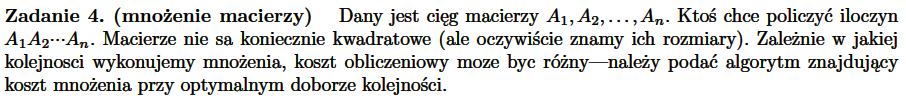

### Omówienie

Świetne wytłumaczenie podejścia Top-down oraz Bottom-up poniżej. <br>
LINK: https://www.youtube.com/watch?v=JMql7zF87aE

###### Ilustracja dla podejścia Bottom-up:
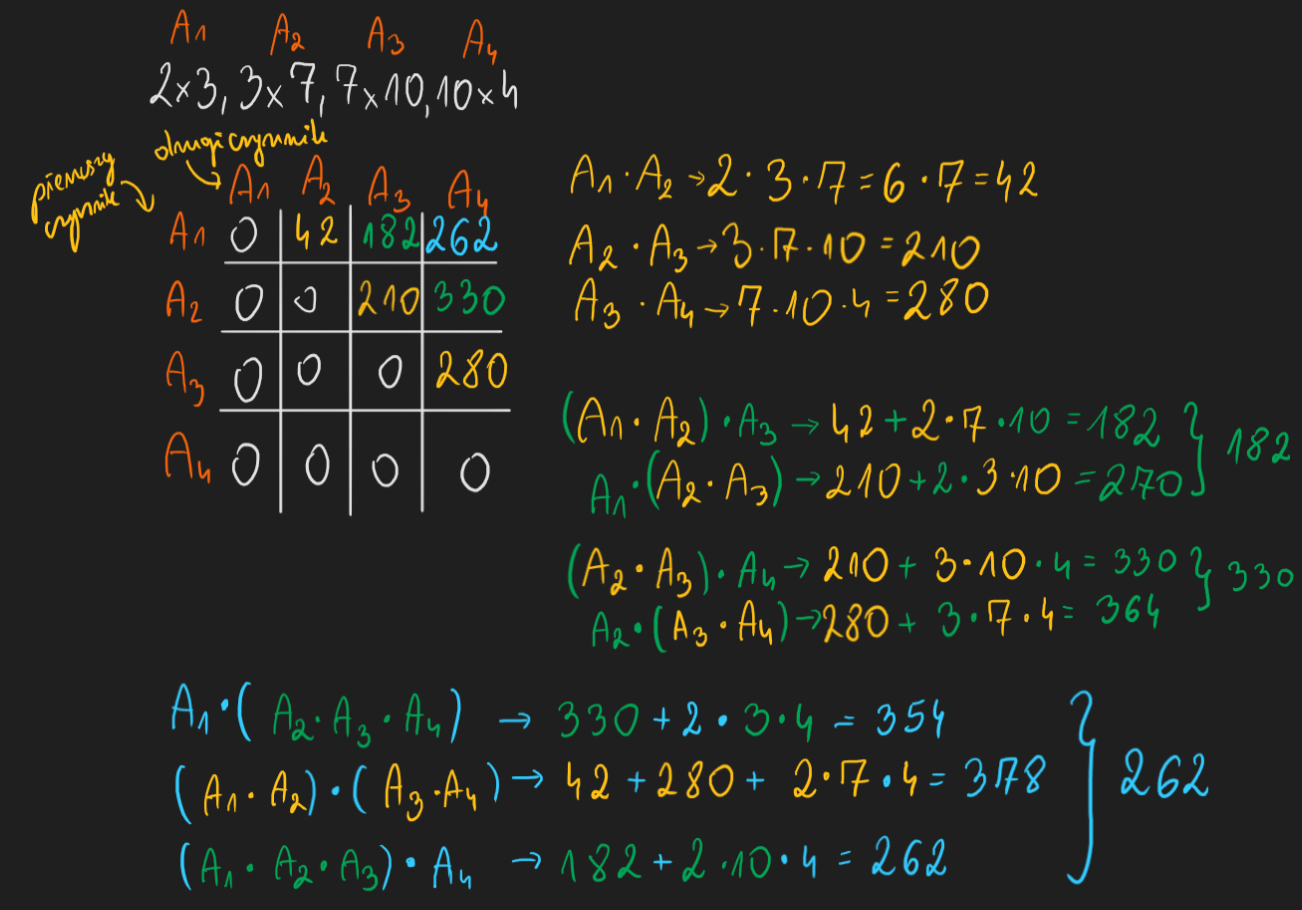

### Złożoność

$ O(n^3) $

### Implementacja

#### Bottom-up

##### Wyjaśnienie funkcji

W poniższym kodzie znajduje się linijka, w której ustalamy minimalny koszt mnożenia danego pociągu ciągu macierzy $ A $. Wygląda ona następująco:

    F[i][i + j] = min(F[i][i + j], F[i][k] + F[k + 1][i + j] + A[i][0] * A[k][1] * A[i + j][1])

Na pierwszy rzut oka można się pogubić, o co chodzi z tymi indeksami, ale już postaram się wytłumaczyć. Weźmy np. ostatni podciąg, jaki rozważamy, czyli cały ciąg macierzy $ A $ (patrz ilustracja wyżej). Wówczas taki podciąg możemy podzielić na 2 podciągi w jednym z $ n - 1 $ miejsc (bo zakładamy, że ciąg ma $ n $ elementów, więc jest $ n - 1 $ przerw pomiędzy parami sąsiednich macierzy). Dlaczego dzielimy na 2 podciągi? Powód jest prosty, zawsze mnożenie macierzy sprowadzi się ostatecznie do pomnożenia 2 macierzy, które sa wynikami wcześniejszych operacji mnożenia na innych podciągach macierzy. W ten sposób, jesteśmy w stanie sprawdzić, jaki podział obecnego podciągu macierzy, będzie dla nas najbardziej korzystny. Dla najdłuższego podciągu z powyższego przykładu, mamy możliwe następujące podziały: <br>
- $ A_1 \cdot (A_2 \cdot A_3 \cdot A_4) $, gdzie jako koszt pomnożenia macierzy $ A_2 \cdot A_3 \cdot A_4 $ bierzemy uprzednio wyznaczony najmniejszy koszt dla tej operacji, <br>
- $ (A_1 \cdot A_2) \cdot (A_3 \cdot A_4) $, gdzie jako koszt pomnożenia macierzy $ A_1 \cdot A_2 $ oraz pomnożenia macierzy $ A_3 \cdot A_4 $ bierzemy uprzednio wyznaczony najmniejszy koszt dla tych operacji, <br>
- $ (A_1 \cdot A_2 \cdot A_3) \cdot A_4 $, gdzie jako koszt pomnożenia macierzy $ A_1 \cdot A_2 \cdot A_3 $ bierzemy uprzednio wyznaczony najmniejszy koszt dla tej operacji, <br>
<br>

Jak widać, sprowadza się to do sprawdzenia wszystkich podziałów danego podciągu na 2 niepuste podciągi, a więc do zwiększania długości pierwszego podciągu i zmniejszania długości drugiego z nich. Musimy tego dokonać w pętli i za każdym razem wybierać najlepszy rezultat (a więc najmniejszą sumaryczną liczbę operacji, jakie trzeba wykonać). W pokazanej wyżej linijce kodu, która przedstawia sposób podejmowania decyzji, zmienna $ k $ oznacza indeks ostatniego elementu (macierzy) z pierwszego przedziału. W takiej sytuacji, w celu otrzymania sumarycznego kosztu dla podziału zbioru przy pewnej wartości $ k $, musimy zsumować koszt pomnożenia pierwszego podciągu macierzy, który zaczyna się od pierwszej macierzy w rozważanym podciągu (o indeksie $ i $), a kończy się na macierzy o indeksie $ k $ oraz koszt wymnożenia podciagu macierzy, który rozpoczyna się od macierzy o indeksie $ k + 1 $, a kończy na ostatniej macierzy w rozważanym podciągu (jej indeks to $ i + j $). Ostatnim krokiem jest dodanie kosztu pomnożenia tych dwóch macierzy, jakie otrzymamy poprzez wymnożenie obu uzyskanych podciągów. Liczba operacji, jakie musimy dokonać podczas mnożenia macierzy, jest równa $ a \cdot b \cdot c $, gdzie $ a $ - liczba wierszy pierwszej macierzy, $ b $ - liczba kolumn pierwszej macierzy oraz liczba wierszy drugiej macierzy, $ c $ - liczba kolumn drugiej macierzy (warto sobie przypomnieć, jak wygląda mnożenie macierzy, a wzór ten stanie się oczywisty). W naszym przypadku sprowadza się to do następującego działania: $ A[i][0] \cdot A[k][1] \cdot A[i + j][1] $, gdzie $ A[i][0] $ - liczba wierszy pierwszej macierzy, $ A[k][1] $ - liczba kolumn pierwszej macierzy wynikowej (po wykonaniu mnożenia będzie równa liczbie kolumn ostatniej macierzy z mnożonego pierwszego podciągu), $ A[i + j][1] $ - liczba kolumn ostatniej mnożonej macierzy w drugim podciągu.
<br><br>
Warto jeszcze zauważyć, że zmienna $ k $ przyjmuje wartości z zakresu od $ i $ do $ i + j $, a więc może osiągać wartość równą $ 0 $ lub $ n - 1 $, co odpowiada sytuacji, w której odpowiednio pierwszy podciąg ma dokładnie 1 element lub drugi podciąg ma dokładnie 1 element. Wówczas nie wykonujemy żadnego mnożenia macierzy w tym podciągu, bo mamy tylko jedną macierz, a samej przez siebie nie chcemy mnożyć. Za koszt takiej operacji przyjmujemy wtedy $ 0 $. W takiej sutuacji, na przekątnej tablicy wartości $ F $, musimy umieścić wartości $ 0 $.

##### Implementacja

In [1]:
def matrices_mul_cost(A):
    if len(A) < 2: return 0
    
    n = len(A)
    F = [[float('inf')] * n for _ in range(n)]
    
    for i in range(n): 
        F[i][i] = 0
    
    for i in range(n - 1):
        F[i][i + 1] = A[i][0] * A[i][1] * A[i + 1][1]
    
    for j in range(2, n):
        for i in range(n - j):
            for k in range(i, i + j):
                F[i][i + j] = min(F[i][i + j], 
                                  F[i][k] + F[k + 1][i + j] + A[i][0] * A[k][1] * A[i + j][1])
    
    print(*F, sep='\n')
    
    return F[0][n - 1]

###### Kilka testów

In [2]:
A = [(2, 3), (3, 7), (7, 10), (10, 4)]
print(matrices_mul_cost(A))

[0, 42, 182, 262]
[inf, 0, 210, 330]
[inf, inf, 0, 280]
[inf, inf, inf, 0]
262


In [3]:
A1 = [(1, 3), (3, 5)] # 15
A2 = [(1, 3), (3, 5), (5, 7)] # 50
A3 = [(40, 20), (20, 30), (30, 10), (10, 30)] # 26000 = (A(BC))D --> 20*30*10 + 40*20*10 + 40*10*30
A4 = [(10, 20), (20, 30), (30, 40), (40, 30)] # 30K
A4 = [(2, 2), (2, 8), (8, 6), (6, 9), (9, 9), (9, 2), (2, 1), (1, 9), (9, 6)] # 287
A5 = [(2, 2), (2, 8), (8, 6), (6, 9), (9, 9), (9, 2), (2, 1)] # 221

for A in (A1, A2, A3, A4, A5):
    print(matrices_mul_cost(A))
    print()

[0, 15]
[inf, 0]
15

[0, 15, 50]
[inf, 0, 105]
[inf, inf, 0]
50

[0, 24000, 14000, 26000]
[inf, 0, 6000, 12000]
[inf, inf, 0, 9000]
[inf, inf, inf, 0]
26000

[0, 32, 120, 228, 390, 398, 221, 239, 287]
[inf, 0, 96, 204, 366, 390, 217, 235, 283]
[inf, inf, 0, 432, 918, 366, 201, 273, 303]
[inf, inf, inf, 0, 486, 270, 153, 207, 243]
[inf, inf, inf, inf, 0, 162, 99, 180, 207]
[inf, inf, inf, inf, inf, 0, 18, 99, 126]
[inf, inf, inf, inf, inf, inf, 0, 18, 66]
[inf, inf, inf, inf, inf, inf, inf, 0, 54]
[inf, inf, inf, inf, inf, inf, inf, inf, 0]
287

[0, 32, 120, 228, 390, 398, 221]
[inf, 0, 96, 204, 366, 390, 217]
[inf, inf, 0, 432, 918, 366, 201]
[inf, inf, inf, 0, 486, 270, 153]
[inf, inf, inf, inf, 0, 162, 99]
[inf, inf, inf, inf, inf, 0, 18]
[inf, inf, inf, inf, inf, inf, 0]
221



#### Top-down

Aby zrozumieć poniższy algorytm, warto przeczytać opis podejścia Bottom-up, ponieważ poniższy algorytm korzysta z tego, co zauważyliśmy wcześniej. Algorytm niżej jest oczywiście nieco łatwiejszy w implementacji i bardziej czytelny, ale działa wolniej niż powyższy, bo korzysta z rekurencji.

In [4]:
def matrices_mul_cost(A):
    if len(A) < 2: return 0
    
    n = len(A)
    inf = float('inf')
    F = [[inf] * n for _ in range(n)]
    
    def mul(i, j):
        if i == j: 
            F[i][j] = 0
        elif j - i == 1: 
            F[i][j] = A[i][0] * A[i][1] * A[j][1]
        elif F[i][j] == inf: 
            for k in range(i, j):
                F[i][j] = min(F[i][j], mul(i, k) + mul(k + 1, j) + A[i][0] * A[k][1] * A[j][1])
                
        return F[i][j]
        
    mul(0, n - 1)
    
    print(*F, sep='\n')
    
    return F[0][n - 1]

###### Kilka testów

In [5]:
A = [(2, 3), (3, 7), (7, 10), (10, 4)]
print(matrices_mul_cost(A))

[0, 42, 182, 262]
[inf, 0, 210, 330]
[inf, inf, 0, 280]
[inf, inf, inf, 0]
262


In [6]:
A1 = [(1, 3), (3, 5)] # 15
A2 = [(1, 3), (3, 5), (5, 7)] # 50
A3 = [(40, 20), (20, 30), (30, 10), (10, 30)] # 26000 = (A(BC))D --> 20*30*10 + 40*20*10 + 40*10*30
A4 = [(10, 20), (20, 30), (30, 40), (40, 30)] # 30K
A4 = [(2, 2), (2, 8), (8, 6), (6, 9), (9, 9), (9, 2), (2, 1), (1, 9), (9, 6)] # 287
A5 = [(2, 2), (2, 8), (8, 6), (6, 9), (9, 9), (9, 2), (2, 1)] # 221

for A in (A1, A2, A3, A4, A5):
    print(matrices_mul_cost(A))
    print()

[inf, 15]
[inf, inf]
15

[0, 15, 50]
[inf, inf, 105]
[inf, inf, 0]
50

[0, 24000, 14000, 26000]
[inf, 0, 6000, 12000]
[inf, inf, 0, 9000]
[inf, inf, inf, 0]
26000

[0, 32, 120, 228, 390, 398, 221, 239, 287]
[inf, 0, 96, 204, 366, 390, 217, 235, 283]
[inf, inf, 0, 432, 918, 366, 201, 273, 303]
[inf, inf, inf, 0, 486, 270, 153, 207, 243]
[inf, inf, inf, inf, 0, 162, 99, 180, 207]
[inf, inf, inf, inf, inf, 0, 18, 99, 126]
[inf, inf, inf, inf, inf, inf, 0, 18, 66]
[inf, inf, inf, inf, inf, inf, inf, 0, 54]
[inf, inf, inf, inf, inf, inf, inf, inf, 0]
287

[0, 32, 120, 228, 390, 398, 221]
[inf, 0, 96, 204, 366, 390, 217]
[inf, inf, 0, 432, 918, 366, 201]
[inf, inf, inf, 0, 486, 270, 153]
[inf, inf, inf, inf, 0, 162, 99]
[inf, inf, inf, inf, inf, 0, 18]
[inf, inf, inf, inf, inf, inf, 0]
221



### (Dodatkowo) Odtwarzanie kolejności działań

Wynikowa krotka zawiera powstawiane odpowiednio nawiasy, a liczby symbolizują indeksy mnożonych przez siebie macierzy (odpowiadają indeksom tych macierzy w tablicy wejściowej $ A $).

    ((0, (1, 2)), 3)

Powyższa krotka oznacza, że najpierw pomnożyliśmy przez siebie macierze $ A[1] $ i $ A[2] $, następnie przemnożyliśmy macierz $ A[0] $ przez rezultat wcześniejszego mnożenia ($ A[1] \cdot A[2] $), a na koniec ten rezultat ($ A[0] \cdot (A[1] \cdot A[2]) $) przemnożyliśmy przez macierz $ A[3] $. Sprawdźmy, czy wynik jest prawidłowy. Powinniśmy otrzymać: 26000. 
<br><br>
Wejściowy ciąg macierzy to: $ A = [(40, 20), (20, 30), (30, 10), (10, 30)] $ <br>
- Mnożymy $ A[1] \cdot A[2] $: 
$ 20 \cdot 30 \cdot 10 = 6000 $
- Mnożymy $ A[0] \cdot (A[1] \cdot A[2]) $:
$ 6000 + (40 \cdot 20 \cdot 10) = 6000 + 8000 = 14000 $
- Mnożymy $ (A[0] \cdot (A[1] \cdot A[2])) \cdot A[3] $:
$ 14000 + (40 \cdot 10 \cdot 30) = 14000 + 12000 = 26000 $
<br>

Dla powyższego przykładu wynik jest prawidłowy.

#### Top-down

In [7]:
def matrices_chain_min_mul_cost_td(A):
    if len(A) < 2: return 0
    
    n = len(A)
    F = [[float('inf')] * n for _ in range(n)]
    S = [[None] * n for _ in range(n)]
    
    def mul(i, j):
        if i == j: 
            F[i][j] = 0
        if j - i == 1: 
            F[i][j] = A[i][0] * A[i][1] * A[j][1]
        if F[i][j] == float('inf'): 
            for k in range(i, j):
                product = mul(i, k) + mul(k + 1, j) + A[i][0] * A[k][1] * A[j][1]
                if product < F[i][j]:
                    F[i][j] = product
                    S[i][j] = k
                
        return F[i][j]
        
    mul(0, n - 1)
    
#     print(*S, sep='\n')

    return F[0][n - 1], restore_mul_order(S, n)


def restore_mul_order(S, n):
    def recur(i, j):
        if S[i][j] is None:
            return (i, j) if i != j else i
        k = S[i][j]
        return (recur(i, k), recur(k + 1, j))
        
    return recur(0, n - 1)

###### Kilka testów

In [8]:
A = [(2, 3), (3, 7), (7, 10), (10, 4)]
print(matrices_chain_min_mul_cost_td(A))

(262, (((0, 1), 2), 3))


In [9]:
A1 = [(1, 3), (3, 5)] # 15
A2 = [(1, 3), (3, 5), (5, 7)] # 50
A3 = [(40, 20), (20, 30), (30, 10), (10, 30)] # 26000 = (A(BC))D --> 20*30*10 + 40*20*10 + 40*10*30
A4 = [(10, 20), (20, 30), (30, 40), (40, 30)] # 30K
A4 = [(2, 2), (2, 8), (8, 6), (6, 9), (9, 9), (9, 2), (2, 1), (1, 9), (9, 6)] # 287
A5 = [(2, 2), (2, 8), (8, 6), (6, 9), (9, 9), (9, 2), (2, 1)] # 221

for A in (A1, A2, A3, A4, A5):
    print(*matrices_chain_min_mul_cost_td(A), sep='\t')
    print()

15	(0, 1)

50	((0, 1), 2)

26000	((0, (1, 2)), 3)

287	((0, (1, (2, (3, (4, (5, 6)))))), (7, 8))

221	(0, (1, (2, (3, (4, (5, 6))))))



#### Bottom-up

In [10]:
def matrices_chain_min_mul_cost_bu(A):
    if len(A) < 2: return 0
    
    n = len(A)
    F = [[float('inf')] * n for _ in range(n)]
    S = [[None] * n for _ in range(n)]
    
    for i in range(n): 
        F[i][i] = 0
    
    for i in range(n - 1):
        F[i][i + 1] = A[i][0] * A[i][1] * A[i + 1][1]
    
    for j in range(2, n):
        for i in range(n - j):
            for k in range(i, i + j):
                product = F[i][k] + F[k + 1][i + j] + A[i][0] * A[k][1] * A[i + j][1]
                if product < F[i][i + j]:
                    F[i][i + j] = product
                    S[i][i + j] = k
    
    return F[0][n - 1], restore_mul_order(S, n)

# The same as above
def restore_mul_order(S, n):
    def recur(i, j):
        if S[i][j] is None:
            return (i, j) if i != j else i
        k = S[i][j]
        return (recur(i, k), recur(k + 1, j))
        
    return recur(0, n - 1)

###### Kilka testów

In [11]:
A = [(2, 3), (3, 7), (7, 10), (10, 4)]
print(matrices_chain_min_mul_cost_bu(A))

(262, (((0, 1), 2), 3))


In [12]:
A1 = [(1, 3), (3, 5)] # 15
A2 = [(1, 3), (3, 5), (5, 7)] # 50
A3 = [(40, 20), (20, 30), (30, 10), (10, 30)] # 26000 = (A(BC))D --> 20*30*10 + 40*20*10 + 40*10*30
A4 = [(10, 20), (20, 30), (30, 40), (40, 30)] # 30K
A4 = [(2, 2), (2, 8), (8, 6), (6, 9), (9, 9), (9, 2), (2, 1), (1, 9), (9, 6)] # 287
A5 = [(2, 2), (2, 8), (8, 6), (6, 9), (9, 9), (9, 2), (2, 1)] # 221

for A in (A1, A2, A3, A4, A5):
    print(*matrices_chain_min_mul_cost_bu(A), sep='\t')
    print()

15	(0, 1)

50	((0, 1), 2)

26000	((0, (1, 2)), 3)

287	((0, (1, (2, (3, (4, (5, 6)))))), (7, 8))

221	(0, (1, (2, (3, (4, (5, 6))))))

